# Taher Muhammedali - 0478012

## Assignment 2 - Task 4 - Data Science ESM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx # Section 4(f)
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

### (a)

In [2]:
# Reading nodes in separate geodataframes

In [3]:
nodeurl = "https://tubcloud.tu-berlin.de/s/8SMwwWQyn6GiPez/download/scigrid-gas-nodes.geojson"
nodes = gpd.read_file(nodeurl).set_index('id')
nodes1 = nodes.copy()
nodes.drop('country_code', inplace=True, axis=1) # Needed to drop in order to make networkx plot
nodes.drop('geometry', inplace=True, axis=1) # Needed to drop in order to make networkx plot
nodes.head(2)

,x,y
id,,
INET_N_855,23.896413,53.017810
INET_N_1828,22.241386,52.984994


In [4]:
edgeurl = "https://tubcloud.tu-berlin.de/s/fF6KKpWtJyS3BmD/download/scigrid-gas-pipelines.geojson"
edges = gpd.read_file(edgeurl).set_index('index')
edges1 = edges.copy()
edges.head(2)

,diameter_mm,is_bothDirection,length_km,max_cap_M_m3_per_d,max_pressure_bar,start_year,bus0,bus1,geometry
index,,,,,,,,,
INET_PL_273_EE_0_Seg_0_Seg_0,1420.0,0,110.841205,90.410959,84.0,1999.0,INET_N_855,INET_N_1828,"LINESTRING (23.89641 53.01781, 22.24139 52.98499)"
INET_PL_273_EE_1_Seg_0_Seg_0,1420.0,0,109.322286,90.410959,84.0,1999.0,INET_N_1828,INET_N_329,"LINESTRING (22.24139 52.98499, 20.61979 52.88148)"


### (b)

In [5]:
# Plotting the plot with colorbar

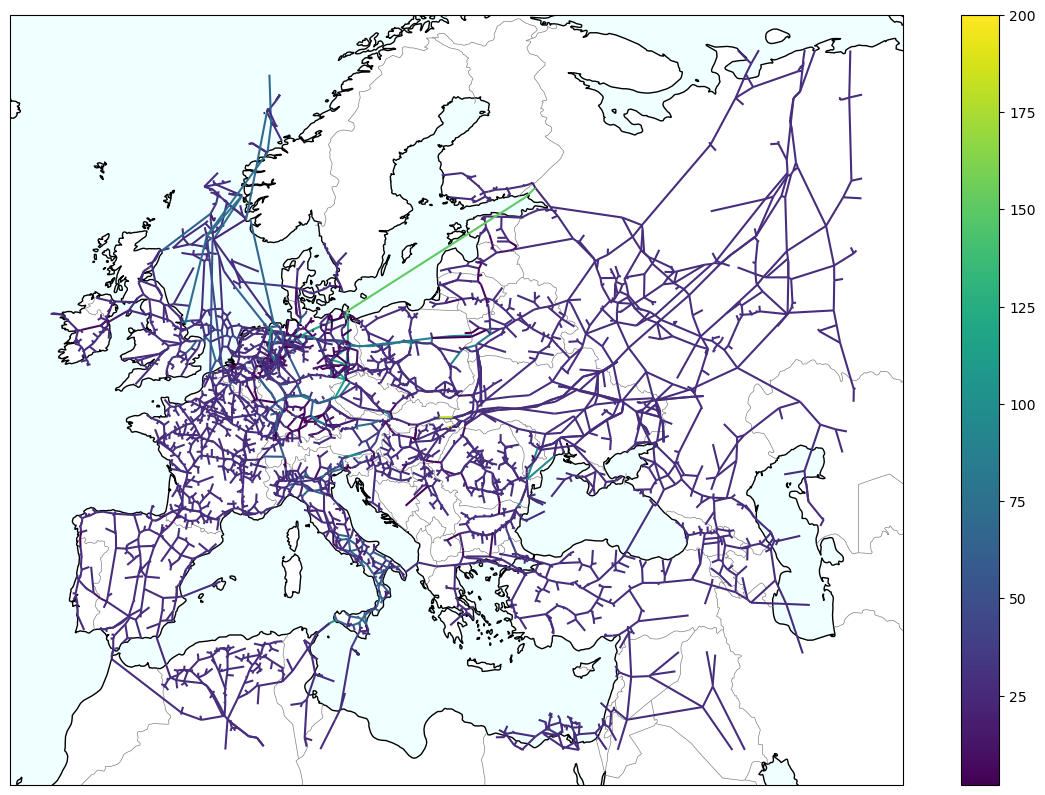

In [6]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.PlateCarree())

edges.plot(
    ax=ax,
    column='max_cap_M_m3_per_d',
    markersize='max_pressure_bar',
    legend=True
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color='azure')

### (c)

In [7]:
# We can see that there are 2 pipelines with the max pressure. Upon further inspection we can see that this is in fact one pipeline in 2 segments.
# Furthermore we can also observe that this pipeline in 1200+ km which is the longest pipeline in this list.
# We can assume that in order to transport at such long distances, these high pressures are required.

In [8]:
pipelist = edges[edges.max_pressure_bar == edges.max_pressure_bar.max()].index.tolist()

In [9]:
print("Max Pressure is %.0f bar in pipelines %s" % (edges.max_pressure_bar.max(), pipelist))

Max Pressure is 220 bar in pipelines ['PLL_84_Seg_0_Seg_0_Seg_0', 'PLL_84_Seg_0_Seg_62_Seg_2']


In [10]:
edges.loc[edges.length_km == edges.length_km.max()] # finding the longest pipeline, which is infact the pipeline with highest pressure

,diameter_mm,is_bothDirection,length_km,max_cap_M_m3_per_d,max_pressure_bar,start_year,bus0,bus1,geometry
index,,,,,,,,,
PLL_84_Seg_0_Seg_0_Seg_0,1153.0,0,1209.172213,150.68,220.0,2011.0,N_50_L_LMGN,SEQ_2254_p,"LINESTRING (13.42279 54.26859, 28.30912 60.44315)"


### (d)

In [11]:
print('There are %.0f bidirectional pipes which is approx %.2f percent' % (edges.is_bothDirection.sum(), (edges.is_bothDirection.sum() / edges.is_bothDirection.count() * 100) ))

There are 205 bidirectional pipes which is approx 3.31 percent


### (e)

In [12]:
# Finding cross country pipelines. We will find that by checking which pipelines begin in one country and end in another

In [13]:
#Ignore reimported CSV files, was not required

In [14]:
nodeurl = "https://tubcloud.tu-berlin.de/s/8SMwwWQyn6GiPez/download/scigrid-gas-nodes.geojson"
nodes1 = gpd.read_file(nodeurl)
nodes2 = nodes1.copy()
nodes1.rename(columns = {'id':'bus0'}, inplace = True)
nodes2.rename(columns = {'id':'bus1'}, inplace = True)

In [15]:
edgeurl = "https://tubcloud.tu-berlin.de/s/fF6KKpWtJyS3BmD/download/scigrid-gas-pipelines.geojson"
edges1 = gpd.read_file(edgeurl)

In [16]:
# Idea is to merge nodes to edges on bus0, then on bus1 to get the Country Names

In [17]:
joined_df = pd.merge(edges1,
                     nodes1,
                     on ='bus0',
                     how ='left')

In [18]:
joined_df2 = pd.merge(joined_df,
                     nodes2,
                     on ='bus1',
                     how ='left')

In [19]:
ccdf = joined_df2.copy()

In [20]:
cc2df = ccdf.loc[ccdf['country_code_x'] != ccdf['country_code_y']]

In [21]:
cc2df.drop(columns=cc2df.columns[-8:], axis=1, inplace=True) # Dropping columns not required for further analysis

In [22]:
cc2df.rename(columns = {'geometry_x':'geometry'}, inplace = True)

In [23]:
print(round((len(cc2df)/len(ccdf) * 100),2),"% of pipelines cross borders")

5.17 % of pipelines cross borders


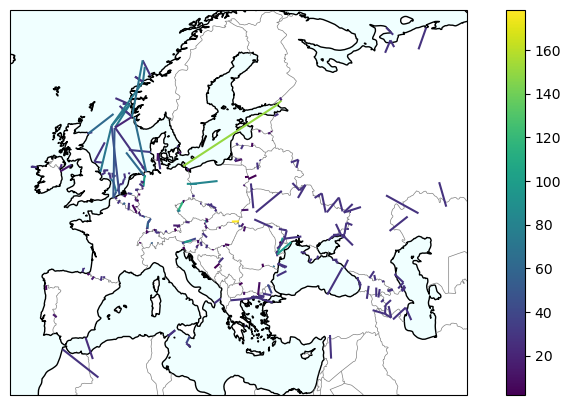

In [24]:
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection=ccrs.PlateCarree())

cc2df.plot(
    ax=ax,
    column='max_cap_M_m3_per_d',
    markersize='max_pressure_bar',
    legend=True
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color='azure')

### (f)

In [25]:
#Importing netwrokx was done at the very beginning

### (g)

In [26]:
# Creating a networkx graph by linking nodes and edges

In [27]:
N = nx.from_pandas_edgelist(edges, 'bus0', 'bus1', edge_attr=["length_km", "diameter_mm", "max_cap_M_m3_per_d", "max_pressure_bar"])

In [28]:
pos = nodes.apply(tuple, axis=1).to_dict()

In [29]:
{k: pos[k] for k in list(pos.keys())[:2]}

{'INET_N_855': (23.896413, 53.01781), 'INET_N_1828': (22.241386, 52.984994)}

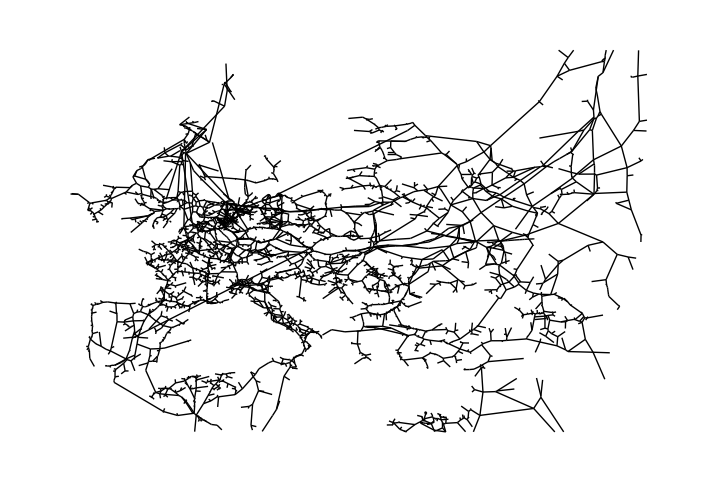

In [30]:
fig, ax = plt.subplots(figsize=(9,6))
nx.draw(N, pos=pos, node_size=0)

### (h)

In [31]:
# Finding the number of nodes and edges

In [32]:
nx.info(N)

'Graph with 4659 nodes and 5566 edges'

### (i)

In [33]:
# Finding the number of connected components and each of their nodes and edges

In [34]:
len(list(nx.connected_components(N)))

8

In [35]:
subgraphs = []
for c in nx.connected_components(N):
    subgraphs.append(N.subgraph(c).copy())

In [36]:
for i in range(0,8):
    G = subgraphs[i]
    print("In component %.0f there are %.0f nodes and %.0f edges" % (i+1, len(G.nodes), len(G.edges)))

In component 1 there are 4643 nodes and 5557 edges
In component 2 there are 2 nodes and 1 edges
In component 3 there are 3 nodes and 2 edges
In component 4 there are 2 nodes and 1 edges
In component 5 there are 3 nodes and 2 edges
In component 6 there are 2 nodes and 1 edges
In component 7 there are 2 nodes and 1 edges
In component 8 there are 2 nodes and 1 edges


In [37]:
# From the above we can see that 1 connected component has many edges and nodes which means it is interconnected with high complexity
# The rest of the components are all 2-3 nodes which are likely inter-country or cross country pipes between 2 countries,
# these are not linked to the main transmission network of component 1

### (j)

In [38]:
# Finding average degree of the network

In [39]:
Ndegree = pd.Series({k: v for k, v in N.degree})
print ("The average degree of the network is %.2f" % pd.Series({k: v for k, v in N.degree}).mean())

The average degree of the network is 2.39


### (k)

In [40]:
# Analysing distribution of degree

In [41]:
# From the below plot we can affirm that the average degree of the network is in fact approx 2.
# The frequency of degrees is a majority of 1 or 3 which means that most of the nodes are connected to either 1 pipeline or 3 pipelines

<AxesSubplot: ylabel='Frequency'>

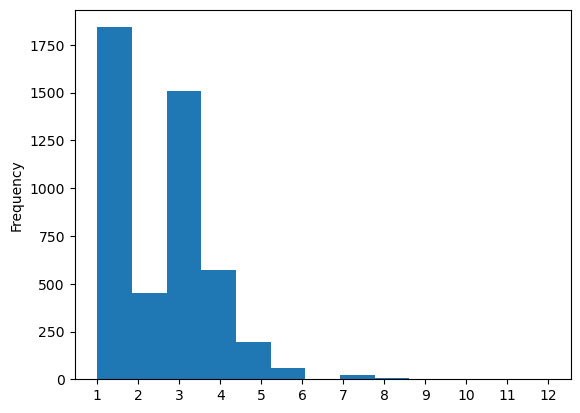

In [42]:
x = np.arange(0, 13, 1)
plt.xticks(x)
Ndegree.plot.hist(bins=13)

### (l)

In [43]:
# Checking if the network is planar

In [44]:
nx.is_planar(N)

False

### (m)

In [45]:
# Calculating Laplacian

In [46]:
A = nx.adjacency_matrix(N, weight=None).todense() # Calculating Adjacency Matrix

In [47]:
degrees = [val for node, val in N.degree()] # Calculating Degree Matrix
D = np.diag(degrees)

In [48]:
L = D - A # Calculaing Laplacian from Adjacency and Degree Matrix
L

matrix([[ 1, -1,  0, ...,  0,  0,  0],
        [-1,  2, -1, ...,  0,  0,  0],
        [ 0, -1,  5, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  1,  0,  0],
        [ 0,  0,  0, ...,  0,  1, -1],
        [ 0,  0,  0, ...,  0, -1,  1]])

In [49]:
L1 = nx.laplacian_matrix(N, weight=None).todense() # Checking if Laplacian calculated through A-D is same as built in Laplacian function
L.all() == L1.all()

True